In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

df = pd.read_csv("../Data_Cleaning/cleaned_telco_data.csv")

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Churn Distribution

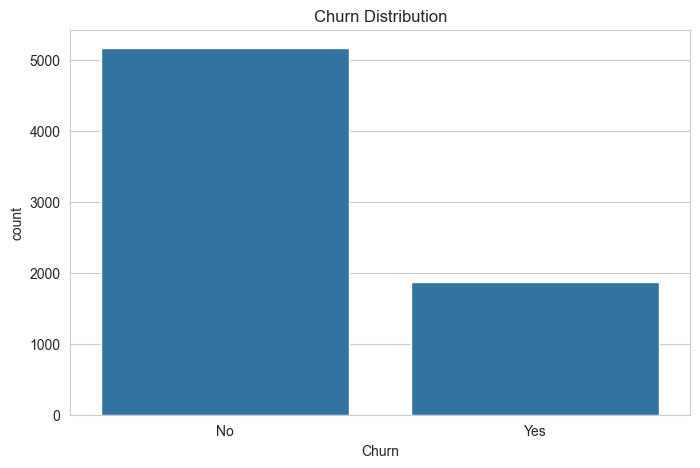

Churn Percentage:

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [3]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

print("Churn Percentage:\n")
print(df["Churn"].value_counts(normalize=True) * 100)

The dataset shows a churn rate of approximately 26.5%, indicating a substantial retention problem that warrants predictive modeling.

---

# Tenure Distribution

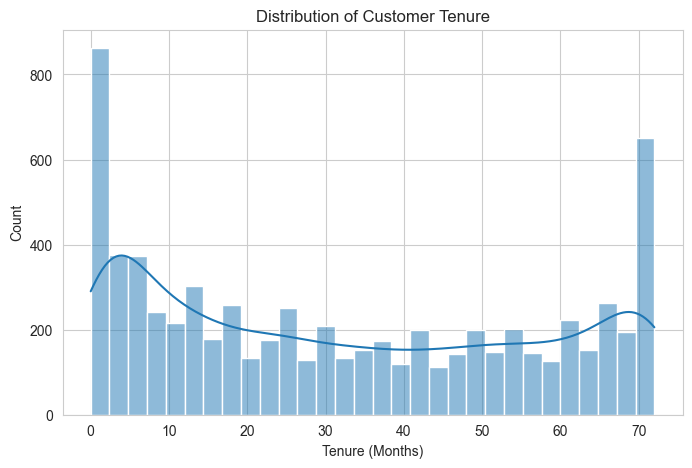

In [4]:
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

# Tenure vs Churn

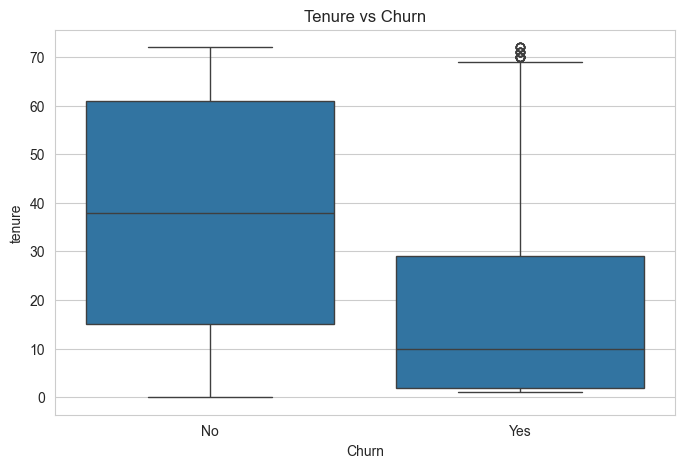

In [5]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

Churned customers have lower median tenure. 
Customer churn risk is significantly higher in early tenure stages, suggesting retention efforts should focus on new customers.

---

# Monthly Charges Distribution

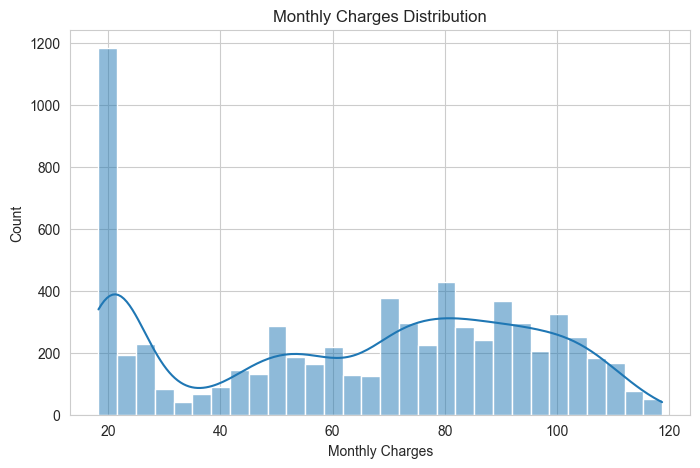

In [6]:
sns.histplot(df["MonthlyCharges"], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.show()

# Monthly Charges vs Churn

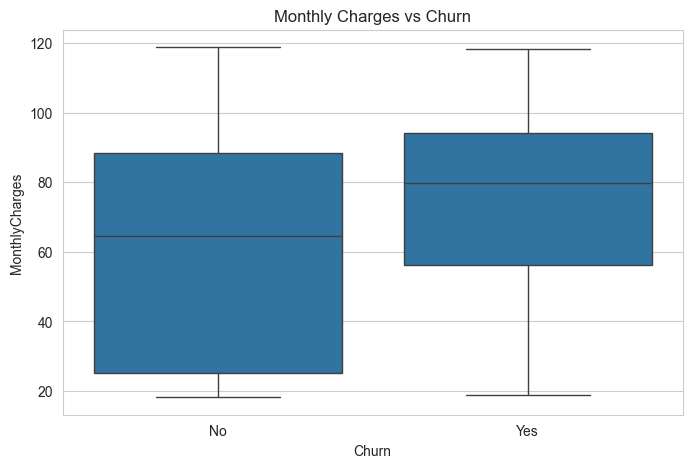

In [7]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Churned customers comparitively pay higher charges

---

# Contract Type vs Churn

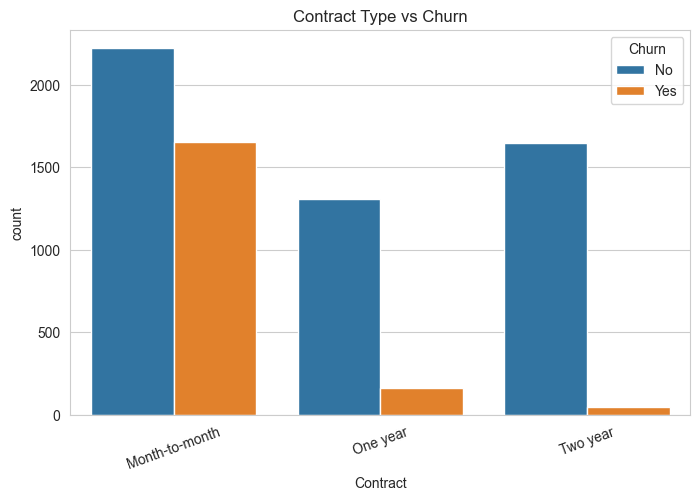

In [8]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=20)
plt.show()

Month to month contracts last long

---

# Internet Service vs Churn

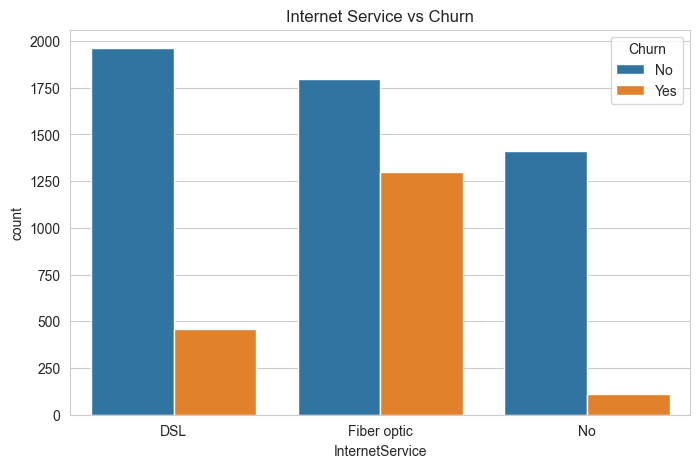

In [9]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Internet Service vs Churn")
plt.show()

Fiber optic users churn more. Fiber optic customers exhibit higher churn rates, possibly due to higher service costs and elevated customer expectations

---

# Correlation Heatmap (Numerical Only)


===== FULL CORRELATION MATRIX =====

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.103006
tenure               0.016567  1.000000        0.247900      0.826178
MonthlyCharges       0.220173  0.247900        1.000000      0.651174
TotalCharges         0.103006  0.826178        0.651174      1.000000


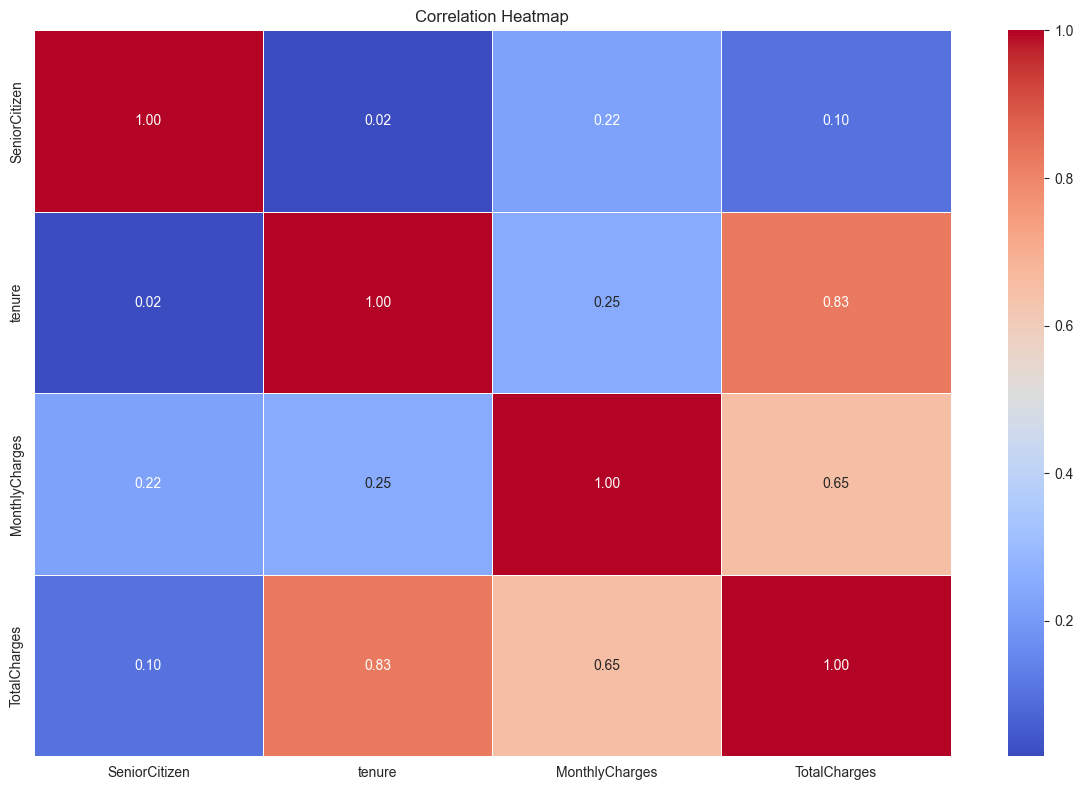

In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()